# 6주차 문제 :서울시 열린데이터 https://data.seoul.go.kr/ 에서 제공하는 ```서울특별시_공공자전거 일별 대여건수_(2018~2019.03).csv```를 분석해보자.

데이터는 다음과 같다
```
|      date| count|

|----------|------|

|2018-01-01|  4950|

|2018-01-02|  7136|

|2018-01-03|  7156|

|2018-01-04|  7102|

|2018-01-05|  7705|

In [1]:
import findspark
findspark.init()

import pyspark
print(pyspark.__version__)

3.1.2


In [2]:
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [3]:
import os
os.environ["PYSPARK_PYTHON"]="C:\\Users\\user\\anaconda3\\python.exe"
os.environ["PYSPARK_DRIVER_PYTHON"]="C:\\Users\\user\\anaconda3\\python.exe"
os.environ["JAVA_HOME"]="C:\\Program Files\\Java\\jdk-11.0.2\\bin"

In [10]:
popDf=spark\
    .read\
    .options(header="true", inferschema='true')\
    .csv(os.path.join("data","서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv"))

    .read.option("charset","euc-kr")\
    .option("header","true")\
    .csv(os.path.join("data","서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv"))
    
    .read\
    .options(header="true", inferschema='true')\
    .csv(os.path.join("data","서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv"))

In [11]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

cols = ["date","count"]
popDf=popDf.withColumnRenamed(popDf.columns[0],cols[0])
popDf=popDf.withColumnRenamed(popDf.columns[1],cols[1])

In [12]:
print(popDf.printSchema())
popDf.show(5)

root
 |-- date: string (nullable = true)
 |-- count: integer (nullable = true)

None
+----------+-----+
|      date|count|
+----------+-----+
|2018-01-01| 4950|
|2018-01-02| 7136|
|2018-01-03| 7156|
|2018-01-04| 7102|
|2018-01-05| 7705|
+----------+-----+
only showing top 5 rows



In [13]:
popDf.groupby(popDf['count']).sum().show(5)

+-----+----------+
|count|sum(count)|
+-----+----------+
| 4929|      4929|
|38806|     38806|
|49503|     49503|
|50343|     50343|
|29177|     29177|
+-----+----------+
only showing top 5 rows



In [14]:
def ye(x): return x[0:4]
popDf=popDf.withColumn('year',ye(popDf.date))

In [15]:
popDf.show(500)

+----------+-----+----+
|      date|count|year|
+----------+-----+----+
|2018-01-01| 4950|2018|
|2018-01-02| 7136|2018|
|2018-01-03| 7156|2018|
|2018-01-04| 7102|2018|
|2018-01-05| 7705|2018|
|2018-01-06| 5681|2018|
|2018-01-07| 5220|2018|
|2018-01-08| 6309|2018|
|2018-01-09| 5988|2018|
|2018-01-10| 4476|2018|
|2018-01-11| 4337|2018|
|2018-01-12| 4401|2018|
|2018-01-13| 3756|2018|
|2018-01-14| 4675|2018|
|2018-01-15| 6993|2018|
|2018-01-16| 7421|2018|
|2018-01-17| 6990|2018|
|2018-01-18| 7054|2018|
|2018-01-19| 8329|2018|
|2018-01-20| 6148|2018|
|2018-01-21| 5574|2018|
|2018-01-22| 4929|2018|
|2018-01-23| 4263|2018|
|2018-01-24| 3370|2018|
|2018-01-25| 3307|2018|
|2018-01-26| 3116|2018|
|2018-01-27| 2833|2018|
|2018-01-28| 3028|2018|
|2018-01-29| 4425|2018|
|2018-01-30| 3591|2018|
|2018-01-31| 4104|2018|
|2018-02-01| 5821|2018|
|2018-02-02| 6557|2018|
|2018-02-03| 3499|2018|
|2018-02-04| 2642|2018|
|2018-02-05| 4213|2018|
|2018-02-06| 4257|2018|
|2018-02-07| 5028|2018|
|2018-02-08| 611

### 문제 1-1 답: 년도별 대여건수 합계

데이터는 2018, 2019년 15개월 간의 대여건수이다. 년도별로 대여건수의 합계를 계산해서 출력하자.


```
|year|sum(count)|

|----|----------|

|2018|  10124874|

|2019|   1871935|

```

In [16]:
from pyspark.sql import functions as F
popDf.groupBy('year').agg({"count":"sum"}).sort('year').show()

+----+----------+
|year|sum(count)|
+----+----------+
|2018|  10124874|
|2019|   1871935|
+----+----------+



In [17]:
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType, DateType

popDf = popDf.withColumn('month',F.month(popDf["date"]))

In [18]:
popDf.printSchema()

root
 |-- date: string (nullable = true)
 |-- count: integer (nullable = true)
 |-- year: string (nullable = true)
 |-- month: integer (nullable = true)



In [19]:
popDf.show(3)

+----------+-----+----+-----+
|      date|count|year|month|
+----------+-----+----+-----+
|2018-01-01| 4950|2018|    1|
|2018-01-02| 7136|2018|    1|
|2018-01-03| 7156|2018|    1|
+----------+-----+----+-----+
only showing top 3 rows



### 문제 1-2 답: 년도별, 월별 대여건수 합계

년별, 월별로 대여건수를 계산하여 합계를 계산하여 출력한다.

In [20]:
myDf=popDf.groupBy('year','month').agg({"count":"sum"}).sort("year","month")

In [21]:
myDf.show()

+----+-----+----------+
|year|month|sum(count)|
+----+-----+----------+
|2018|    1|    164367|
|2018|    2|    168741|
|2018|    3|    462661|
|2018|    4|    687885|
|2018|    5|    965609|
|2018|    6|   1207123|
|2018|    7|   1100015|
|2018|    8|   1037505|
|2018|    9|   1447993|
|2018|   10|   1420621|
|2018|   11|    961532|
|2018|   12|    500822|
|2019|    1|    495573|
|2019|    2|    471543|
|2019|    3|    904819|
+----+-----+----------+



In [22]:
import pandas as pd
sumCount = popDf.groupBy('year').pivot('month').agg({"count":"sum"})
pdf = sumCount.toPandas()

In [23]:
pdf.head()

,year,1,2,3,4,5,6,7,8,9,10,11,12
0,2019,495573,471543,904819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,164367,168741,462661,687885.0,965609.0,1207123.0,1100015.0,1037505.0,1447993.0,1420621.0,961532.0,500822.0


In [24]:
my=pdf.drop('year',1).transpose()

In [25]:
my

,0,1
1,495573.0,164367.0
2,471543.0,168741.0
3,904819.0,462661.0
4,NaN,687885.0
5,NaN,965609.0
6,NaN,1207123.0
7,NaN,1100015.0
8,NaN,1037505.0
9,NaN,1447993.0
10,NaN,1420621.0


### 문제 1-3답: 년도별, 월별 대여건수 그래프

문제 1-2의 출력을 선 그래프로 그려보자.

<AxesSubplot:>

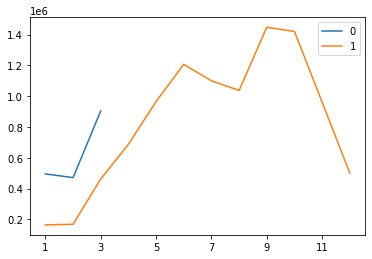

In [26]:
my.plot(kind='line')